In [1]:
!pip install Fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for Fuzzy: filename=Fuzzy-1.2.2-cp37-cp37m-linux_x86_64.whl size=163994 sha256=f85eefa02c1641a631524bf00a1d7a9ec7a33bbeca85f2aa3e731e8428c7d56f
  Stored in directory: /root/.cache/pip/wheels/c8/52/8a/bb2d05fbf343752a8546682cb5b2d775cc0d1f27f6c43f95dd
Successfully built Fuzzy


In [2]:
import fuzzy
print(fuzzy.nysiis('colour'))
print(fuzzy.nysiis('color'))

CALAR
CALAR


In [3]:
import pandas as pd
# Readinf the csv file (dataset) with delimiter set as ;
author_df=pd.read_csv("/content/nytkids_yearly.csv",delimiter=';')

# Looping over author_df to get the author's name and save it in first_name

first_name=[]
for name in author_df['Author']:
    first_name.append(name.split()[0])

#Adding this first name as a column in author_df

author_df['first_name']=first_name

#Checking the first few rows of author_df
author_df.head()


,Year,Book Title,Author,Besteller this year,first_name
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew
3,2017,"ROSIE REVERE, ENGINEER",Andrea Beaty,38,Andrea
4,2017,"ADA TWIST, SCIENTIST",Andrea Beaty,28,Andrea


In [4]:
import numpy as np

#Looping through author's name to create a nysiis(fuzzy) equivalent

nysiis_name=[]
for name in first_name:
    nysiis_name.append(fuzzy.nysiis(name))
    
#Adding this nysiis_name as a column in the dataset

author_df['nysiis_name']=nysiis_name

print(author_df.head())

#Printing out the difference between the first_name and the unique nysiis_name:
print("\n \n Difference between unique nysiis_names and the firstnames is: ",len(np.unique(first_name))-len(np.unique(nysiis_name)))

   Year                        Book Title                 Author  \
0  2017                DRAGONS LOVE TACOS             Adam Rubin   
1  2017  THE WONDERFUL THINGS YOU WILL BE  Emily Winfield Martin   
2  2017          THE DAY THE CRAYONS QUIT           Drew Daywalt   
3  2017            ROSIE REVERE, ENGINEER           Andrea Beaty   
4  2017              ADA TWIST, SCIENTIST           Andrea Beaty   

   Besteller this year first_name nysiis_name  
0                   49       Adam        ADAN  
1                   48      Emily       ENALY  
2                   44       Drew          DR  
3                   38     Andrea        ANDR  
4                   28     Andrea        ANDR  

 
 Difference between unique nysiis_names and the firstnames is:  25


In [5]:
#Reading the dataset of the babynames with a delimiter ;
babies_df=pd.read_csv('babynames_nysiis.csv',delimiter=';')

#Looping over the babies_df and filling up the gender

gender=[]

for i in babies_df.index:
    if(babies_df['perc_male'][i]==babies_df['perc_female'][i]):
        gender.append('N')
    elif(babies_df['perc_male'][i]>babies_df['perc_female'][i]):
        gender.append('M')
    else:
        gender.append('F')
        
# addind the gender list as a column in the dataset
babies_df['gender']=gender

#printing the first few rows of the babies_df
babies_df.head()


,babynysiis,perc_female,perc_male,gender
0,NaN,62.50,37.50,F
1,RAX,63.64,36.36,F
2,ESAR,44.44,55.56,M
3,DJANG,0.00,100.00,M
4,PARCAL,25.00,75.00,M


In [6]:
# defining a function to locate the presence of a name in the list
def locate_in_list(a_list,element):
    loc_of_name=a_list.index(element) if element in a_list else -1
    return (loc_of_name)

# Making a list of the gender of the author using their nysiis_name
author_gender=[]
for name in author_df['nysiis_name']:
    index=locate_in_list(list(babies_df['babynysiis']),name)
    if index > -1:
        author_gender.append(babies_df.loc[index]['gender'])
    else:
        author_gender.append('Unknown')
        
#Adding this as a column in the dataset
author_df['gender']=author_gender

#Counting the author's gender
author_df['gender'].count()

#Printing the first few rows of the dataset
author_df.head()

,Year,Book Title,Author,Besteller this year,first_name,nysiis_name,gender
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam,ADAN,M
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily,ENALY,F
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew,DR,M
3,2017,"ROSIE REVERE, ENGINEER",Andrea Beaty,38,Andrea,ANDR,M
4,2017,"ADA TWIST, SCIENTIST",Andrea Beaty,28,Andrea,ANDR,M


In [7]:
#Let's Create a list of (unique) years , sorted in ascending order 
years=author_df['Year'].sort_values().unique()

#Initializing the lists of genders w.r.t year

males_by_yr=[]
females_by_yr=[]
unknown_by_yr=[]

for year in years:
    females_by_yr.append(len(author_df[(author_df['gender']=='F') & (author_df['Year']==year)]))
    males_by_yr.append(len(author_df[(author_df['gender']=='M') & (author_df['Year']==year)]))
    unknown_by_yr.append(len(author_df[(author_df['gender']!='F') & (author_df['gender']!='M') & (author_df['Year']==year)]))

print(females_by_yr)
print(males_by_yr)
print(unknown_by_yr)

data=np.array([males_by_yr,females_by_yr,unknown_by_yr])
headers=['Males','Females','Unknown']
print(pd.DataFrame(data,headers,years))

[15, 45, 48, 51, 46, 51, 34, 30, 32, 43]
[8, 19, 27, 21, 21, 11, 21, 18, 25, 20]
[2, 3, 1, 2, 2, 3, 2, 0, 1, 1]
         2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
Males       8    19    27    21    21    11    21    18    25    20
Females    15    45    48    51    46    51    34    30    32    43
Unknown     2     3     1     2     2     3     2     0     1     1


Text(0, 0.5, 'Number of Foreign Authors')

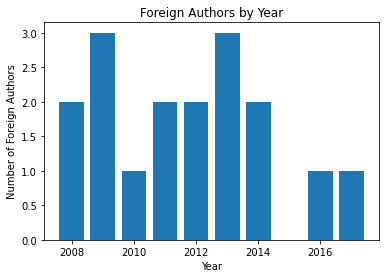

In [8]:
import matplotlib.pyplot as plt 

#Let's first make the plot appear 

%matplotlib inline

#Let's plot the bar chart now 
plt.bar(years,unknown_by_yr)

#We can also set a title and axes labels just to make the plot look a little good ;)

plt.title('Foreign Authors by Year')
plt.xlabel('Year')
plt.ylabel('Number of Foreign Authors')